In [2]:
!!pip install mlxtend

['Requirement already satisfied: mlxtend in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (0.22.0)',
 'Requirement already satisfied: scikit-learn>=1.0.2 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (1.2.1)',
 'Requirement already satisfied: numpy>=1.16.2 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (1.23.5)',
 'Requirement already satisfied: scipy>=1.2.1 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (1.10.0)',
 'Requirement already satisfied: matplotlib>=3.0.0 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (3.7.0)',
 'Requirement already satisfied: joblib>=0.13.2 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (1.1.1)',
 'Requirement already satisfied: pandas>=0.24.2 in /Users/da_m1_39/anaconda3/lib/python3.10/site-packages (from mlxtend) (1.5.3)',
 'Requirement already satisfied: setuptools in /Users/da_m1_39/anaconda3/lib/python3.10/site-pack

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [5]:
df1= pd.read_csv('/Users/da_m1_39/Desktop/AirBnb/airBNB.csv')

In [6]:
df1.shape

(48895, 16)

In [7]:
df1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [8]:
df1.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


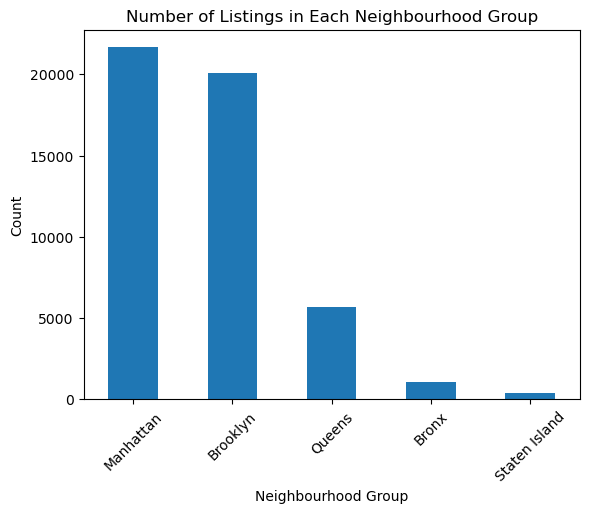

In [31]:

unique_neighbourhood_groups = df1['neighbourhood_group'].unique()


df1['neighbourhood_group'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Number of Listings in Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


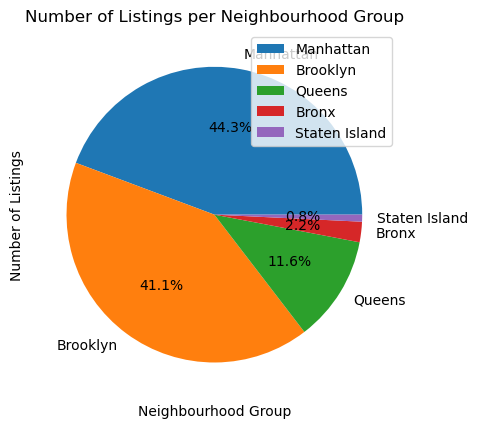

In [34]:



# Count the number of listings per neighbourhood group
listings_per_neighbourhood_group = df1['neighbourhood_group'].value_counts()

# Plot the pie chart
listings_per_neighbourhood_group.plot(kind='pie', autopct='%1.1f%%')

# Add a legend
plt.legend(listings_per_neighbourhood_group.index, loc='best')

# Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighbourhood Group')

# Display the pie chart
plt.show()





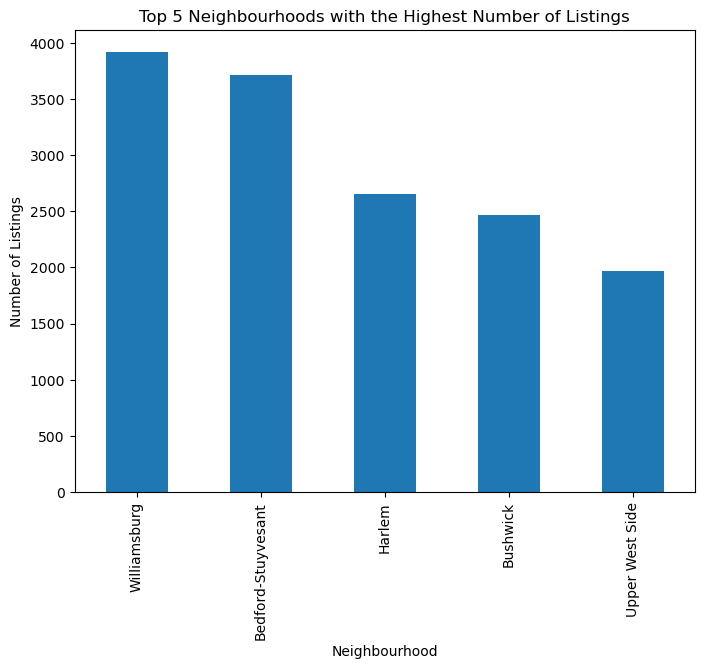

In [35]:



# Group the data by neighbourhood and count the number of listings
top_neighbourhoods = df1.groupby('neighbourhood')['id'].size().nlargest(5)

# Create a bar plot
plt.figure(figsize=(8, 6))
top_neighbourhoods.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 5 Neighbourhoods with the Highest Number of Listings')

# Display the chart
plt.show()



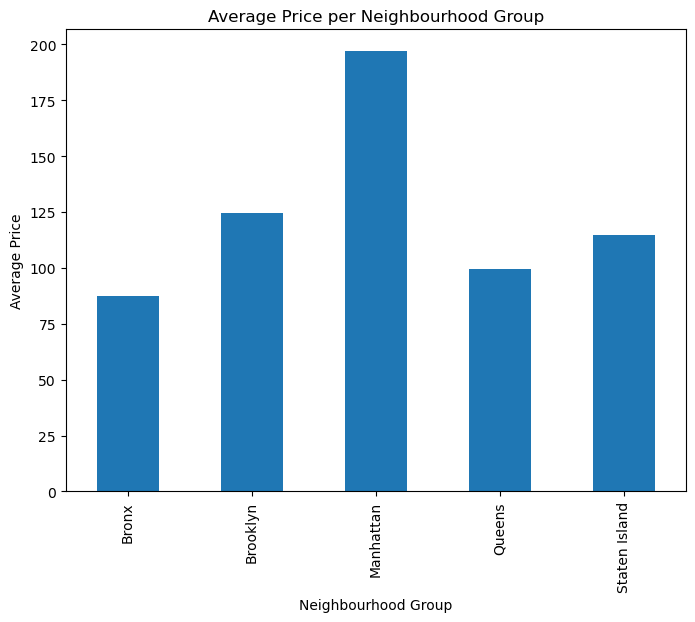

In [36]:





# Calculate the average price per neighbourhood group
average_price_per_neighbourhood_group = df1.groupby('neighbourhood_group')['price'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
average_price_per_neighbourhood_group.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price per Neighbourhood Group')

# Display the chart
plt.show()



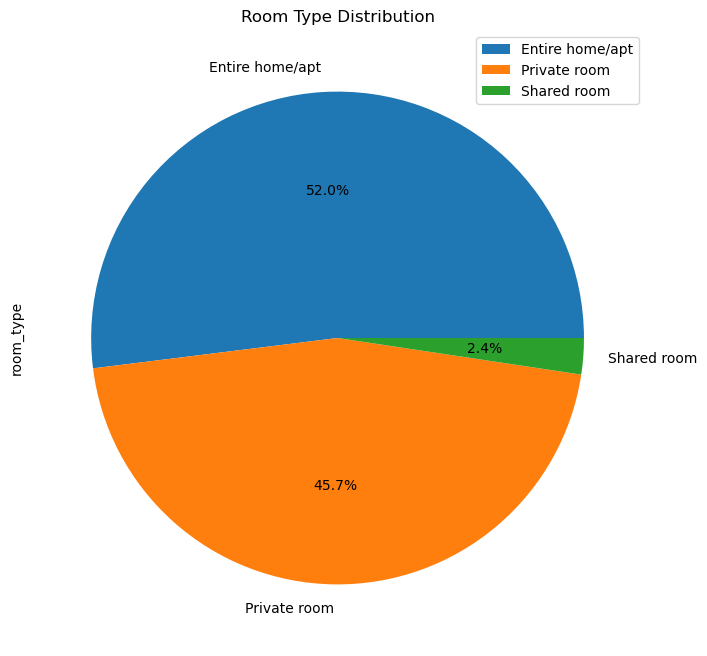

In [37]:


# Count the occurrences of each room type
room_type_counts = df1['room_type'].value_counts()

# Determine the most common room type
most_common_room_type = room_type_counts.idxmax()

# Create a pie chart
plt.figure(figsize=(8, 8))
room_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Room Type Distribution')

# Add a legend
plt.legend(room_type_counts.index, loc='upper right')

# Display the chart
plt.show()



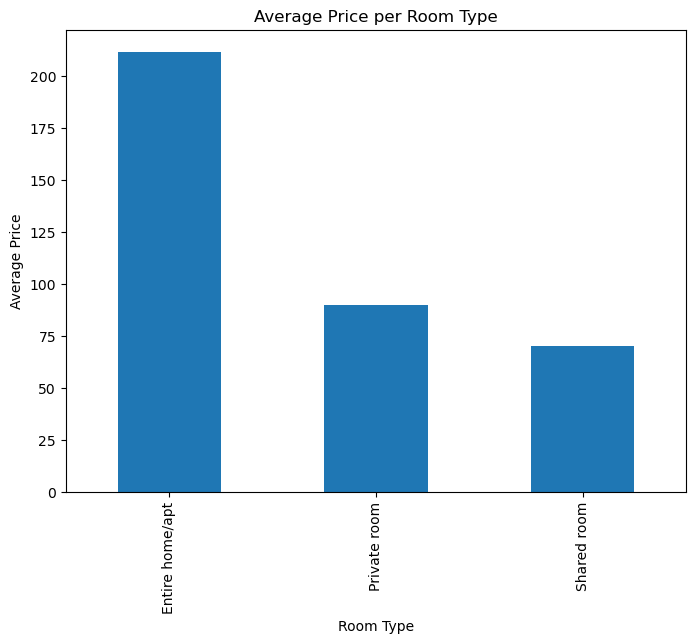

In [38]:



# Calculate the average price per room type
average_price_per_room_type = df1.groupby('room_type')['price'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
average_price_per_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price per Room Type')

# Display the chart
plt.show()



<Figure size 1000x600 with 0 Axes>

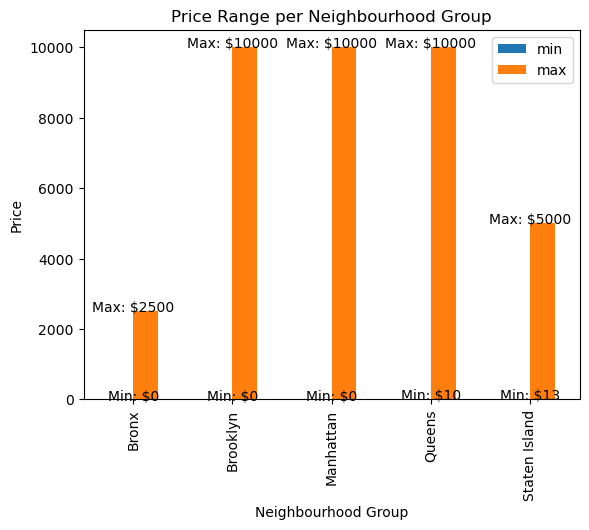

In [8]:


# Calculate the minimum and maximum prices per neighbourhood group
price_range_per_neighbourhood_group = df1.groupby('neighbourhood_group')['price'].agg(['min', 'max'])

# Create a bar plot
plt.figure(figsize=(10, 6))
price_range_per_neighbourhood_group.plot(kind='bar')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Range per Neighbourhood Group')

# Add labels to show the minimum and maximum values on each bar
for i, row in enumerate(price_range_per_neighbourhood_group.iterrows()):
    min_price = row[1]['min']
    max_price = row[1]['max']
    plt.text(i, min_price - 20, f'Min: ${min_price}', ha='center')
    plt.text(i, max_price + 10, f'Max: ${max_price}', ha='center')

# Display the chart
plt.show()



<Figure size 1000x600 with 0 Axes>

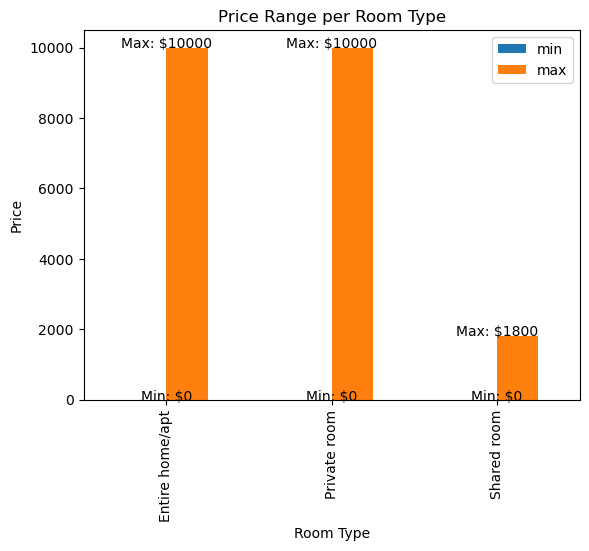

In [9]:


# Calculate the minimum and maximum prices per room type
price_range_per_room_type = df1.groupby('room_type')['price'].agg(['min', 'max'])

# Create a bar plot
plt.figure(figsize=(10, 6))
price_range_per_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Range per Room Type')

# Add labels to show the minimum and maximum values on each bar
for i, row in enumerate(price_range_per_room_type.iterrows()):
    room_type = row[0]
    min_price = row[1]['min']
    max_price = row[1]['max']
    plt.text(i, min_price - 20, f'Min: ${min_price}', ha='center')
    plt.text(i, max_price + 10, f'Max: ${max_price}', ha='center')

# Display the chart
plt.show()



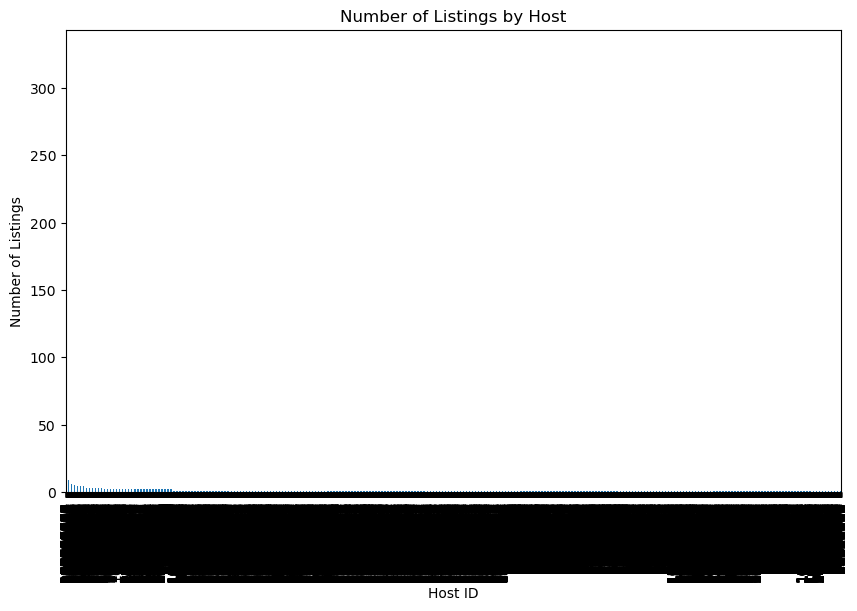

In [30]:


host_counts = df1['host_id'].value_counts()

# Get the host with the highest number of listings
top_host = host_counts.idxmax()

# Plotting the graph
plt.figure(figsize=(10, 6))
host_counts.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Host')
plt.show()

# Print the host with the highest number of listings



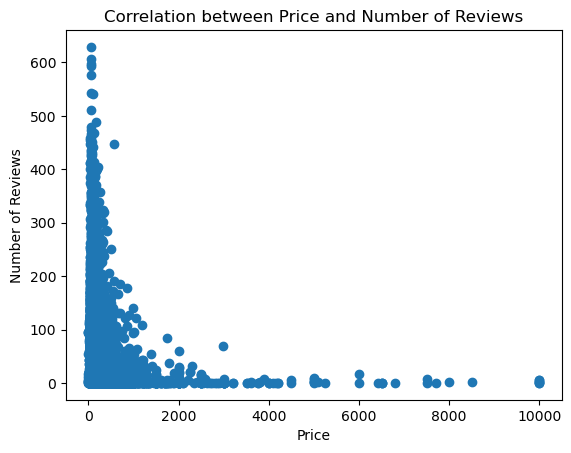

Correlation coefficient: -0.0479542265826622


In [28]:

correlation = df1['price'].corr(df1['number_of_reviews'])

# Create a scatter plot
plt.scatter(df1['price'], df1['number_of_reviews'])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')
plt.show()

# Print the correlation coefficient
print('Correlation coefficient:', correlation)
